# <font color='blue'> 0.0. PLANEJAMENTO DA SOLUÇÃO

## 0.1. ENTRADAS

### 0.1.1. CONTEXTO DO NEGÓCIO

A empresa Data Money fornece serviços de consultoria de Análise e Ciência de Dados para grandes empresas no Brasil e no exterior.

O seu principal diferencial de mercado em relação aos concorrentes é o alto retorno financeiro para as empresas clientes, graças a performance de seus algoritmos de Machine Learning.

A Data Money acredita que a expertise no treinamento e ajuste fino dos algoritmos, feito pelos Cientistas de Dados da empresa, é a principal motivo dos ótimos resultados que as consultorias vem entregando aos seus clientes.

Para continuar crescendo a expertise do time, os Cientistas de Dados acreditam que é extremamente importante realizar ensaios nos algoritmos de Machine Learning para adquirir uma experiência cada vez maior sobre o seu funcionamento e em quais cenários as performances são máximas e mínimas, para que a escolha do algoritmo para cada situação seja a mais correta possível.

Como Cientista de Dados recém contratado pela empresa, a sua principal tarefa será realizar 3 ensaios com algoritmos de Classificação, Regressão e Clusterização, a fim de extrair aprendizados sobre o seu funcionamento em determinados cenário e conseguir transmitir esse conhecimento para o restante do time.


## 0.2. SAÍDAS

O ensaio de Machine Learning ajuda os Cientistas de Dados a ganhar mais experiência na aplicação dos algoritmos. Nesse ensaio, em específico, cada algoritmo será treinado com os dados de treinamento e sua performance será medida usando 3 conjuntos de dados:
1. Os próprios dados de treinamento
2. Os dados de validação
3. Os dados de teste.

A performance de cada algoritmo será medida, utilizando diferentes métricas de performance.

O seu trabalho nesse ensaio será construir uma tabela mostrando os valores das métricas de performance para cada algoritmo de Machine Learning.

Cada tabela vai armazenar os resultados da performance sobre um conjunto de dados diferentes, ou seja, você precisa criar 3 tabelas: 1) Performance sobre os dados de treinamento, 2) Performance sobre os dados de validação e 3) Performance sobre os dados de teste para o Ensaio de classificação, regressão e clusterização.

Classificação:
Algoritmos: KNN, Decision Tree, Random Forest e Logistic Regression
Métricas de performance: Accuracy, Precision, Recall e F1-Score


Regressão:
Algoritmos: Linear Regression, Decision Tree Regressor, Random Forest Regressor, Polinomial Regression, Linear Regression Lasso, Linear Regression Ridge, Linear Regression Elastic Net, Polinomial Regression Lasso, Polinomial Regression Ridge e Polinomial Regression Elastic Net
Métricas de performance: R2, MSE, RMSE, MAE e MAPE


Agrupamento:
Algoritmos: K-Means e Affinity Propagation
Métricas de performance: Silhouette Score


# <font color='blue'> 1.0. IMPORTS

## 1.1. BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Classificação
from sklearn.neighbors    import KNeighborsClassifier
from sklearn              import metrics as mt
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Regressão
from sklearn.metrics       import mean_absolute_error
from sklearn.tree          import DecisionTreeRegressor
from sklearn.ensemble      import RandomForestRegressor
from sklearn.linear_model  import LinearRegression
from sklearn.linear_model  import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import ElasticNet
from sklearn.pipeline      import make_pipeline

## 1.2. HELPER FUNCTIONS

In [ ]:
# Performance Classificação
def performance_model( model_name, y, yhat ):
  accuracy = round(mt.accuracy_score( y, yhat ), 3)
  precision = round(mt.precision_score( y, yhat ),3)
  recall = round(mt.recall_score( y, yhat ),3)
  f1 = round(mt.f1_score( y, yhat ),3)

  return pd.DataFrame({'Model Name':model_name,
                       'Accuracy':accuracy,
                       'Precision':precision,
                       'Recall':recall,
                       'F1-Score': f1}, index=[0])



import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
  mask = y_true != 0
  y_true_nonzero = y_true[mask]
  y_pred_nonzero = y_pred[mask]

  if len(y_true_nonzero) == 0:
      return np.nan

  mape = np.mean(np.abs((y_true_nonzero - y_pred_nonzero) / y_true_nonzero)) * 100
  return mape


# Performance Regressão
def performance_regressao( model_name, y, yhat ):
  r2_squared = np.round( mt.r2_score( y, yhat ), 3 )
  mse = np.round( mt.mean_squared_error( y, yhat ), 3 )
  rmse = np.round( np.sqrt( mse ), 3 )
  mae = np.round( mean_absolute_error(y, yhat), 3 )
  mape = np.round( mean_absolute_percentage_error(y, yhat), 3 )

  return pd.DataFrame({'Model Name':model_name,
                       'R2':r2_squared,
                       'MSE':mse,
                       'RMSE':rmse,
                       'MAE':mae,
                       'MAPE':mape}, index=[0])

## 1.3. LOAD DATASET

### 1.3.1. Classificação

In [ ]:
# TREINO
X_train = pd.read_csv('/content/X_training.csv')
y_train = pd.read_csv('/content/y_training.csv')

# VALIDAÇÃO
X_val = pd.read_csv('/content/X_validation.csv')
y_val = pd.read_csv('/content/y_validation.csv')

# TESTE
X_test = pd.read_csv('/content/X_test.csv')
y_test = pd.read_csv('/content/y_test.csv')

# <font color='blue'> 2.0. CLASSIFICAÇÃO

## 2.1. MODEL TRAINING

### 2.1.1 KNN

In [ ]:
k = range(1,10)
acc_knn = []
# TREINAMENTO DO KNN

for i in k:
  knn_model = KNeighborsClassifier( n_neighbors = i )
  # Transforma y_train e y_val em vetores unidimensionais

  y_training = y_train['0'].ravel()
  knn_model.fit( X_train, y_training )

  yhat = knn_model.predict( X_val )
  acc_knn.append( round(mt.accuracy_score( y_val, yhat ), 3)  )

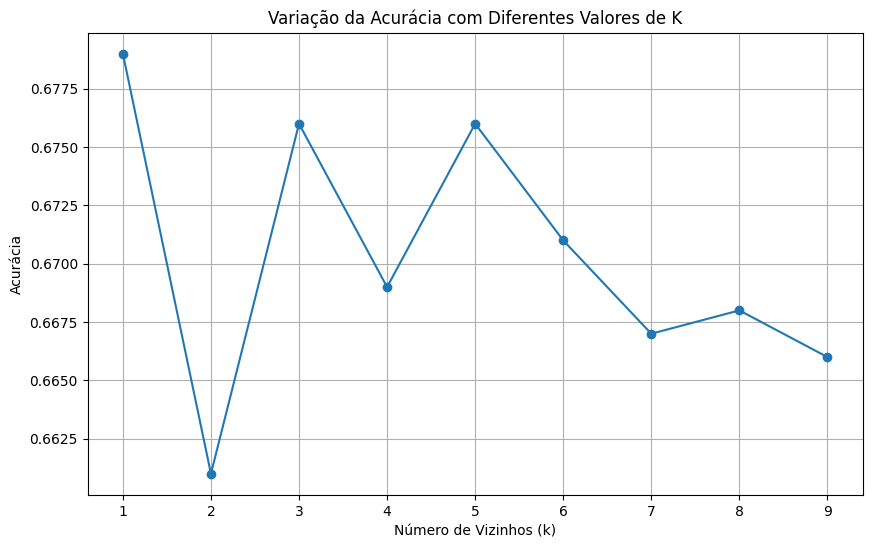

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(k, acc_knn, marker='o')
plt.title('Variação da Acurácia com Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.xticks(k)
plt.grid(True)
plt.show()

### 2.1.2 DECISION TREE

In [ ]:
k = range(9,20)
acc_tree = []
for i in k:
  tree_model = DecisionTreeClassifier( max_depth = i)
  y_training = y_train['0'].ravel()
  tree_model.fit( X_train, y_training )

  yhat = tree_model.predict( X_val )
  acc_tree.append( round(mt.accuracy_score( y_val, yhat ), 3)  )

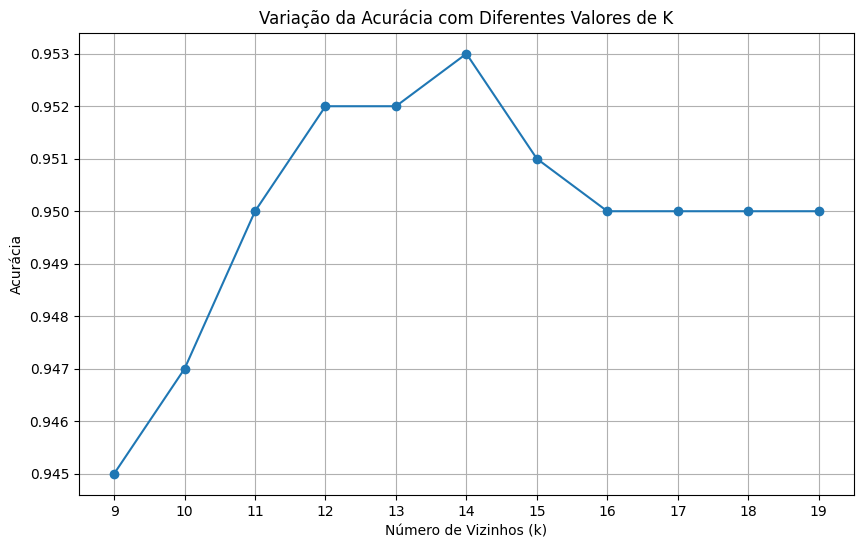

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(k, acc_tree, marker='o')
plt.title('Variação da Acurácia com Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.xticks(k)
plt.grid(True)
plt.show()

### 2.1.3. RANDOM FOREST

In [ ]:
param = {
    'n_estimators':[10,100, 500, 1000, 1500, 3000,1000],
    'max_depth':[1,3,5,9,11,15,25,30,100,500,1000]
    }

MAX_EVAL=10

In [ ]:
acc=[]
k=[]

for i in range(MAX_EVAL):
    hp = {k: random.choice(v) for k, v in param.items()}
    print(hp)

# Model
    rf = RandomForestClassifier( n_estimators=hp['n_estimators'],
                            max_depth=hp['max_depth'])

# Performance
    y_training = y_train['0'].ravel()
    rf.fit( X_train, y_training )

    yhat = rf.predict( X_val )
    acc.append( round(mt.accuracy_score( y_val, yhat ), 3)  )
    k.append(i+1)


acc

{'n_estimators': 10, 'max_depth': 30}
{'n_estimators': 1000, 'max_depth': 3}
{'n_estimators': 1000, 'max_depth': 3}
{'n_estimators': 10, 'max_depth': 25}
{'n_estimators': 500, 'max_depth': 9}
{'n_estimators': 500, 'max_depth': 1000}
{'n_estimators': 3000, 'max_depth': 30}
{'n_estimators': 1000, 'max_depth': 1}
{'n_estimators': 1000, 'max_depth': 3}
{'n_estimators': 1000, 'max_depth': 25}


[0.959, 0.892, 0.898, 0.961, 0.946, 0.965, 0.965, 0.857, 0.898, 0.965]

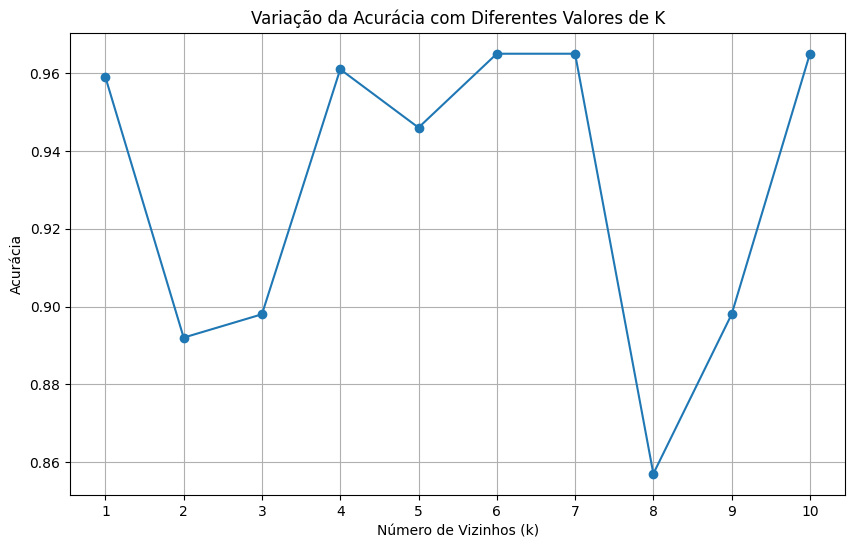

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(k, acc, marker='o')
plt.title('Variação da Acurácia com Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.xticks(k)
plt.grid(True)
plt.show()

### 2.1.4. LOGISTIC REGRESSION

In [ ]:
param = {
    'C':[0.1, 0.5, 1.0, 1.500, 3.0],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[10]
    }

MAX_EVAL=10

In [ ]:
acc = []
k = []

for i in range(MAX_EVAL):
    hp = {k: random.choice(v) for k, v in param.items()}
    print(hp)

# Model
    lg = LogisticRegression( C=hp['C'],
                            solver=hp['solver'],
                            max_iter=hp['max_iter'])

    # Performance
    y_training = y_train['0'].ravel()
    lg.fit( X_train, y_training )

    yhat = lg.predict( X_val )
    acc.append( round(mt.accuracy_score( y_val, yhat ), 3)  )
    k.append(i+1)


acc

{'C': 3.0, 'solver': 'newton-cg', 'max_iter': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


{'C': 3.0, 'solver': 'newton-cg', 'max_iter': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


{'C': 1.5, 'solver': 'saga', 'max_iter': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'C': 1.5, 'solver': 'saga', 'max_iter': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'C': 1.5, 'solver': 'sag', 'max_iter': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'C': 1.0, 'solver': 'sag', 'max_iter': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'C': 1.5, 'solver': 'saga', 'max_iter': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'C': 0.5, 'solver': 'saga', 'max_iter': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'C': 1.0, 'solver': 'liblinear', 'max_iter': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'C': 1.5, 'solver': 'sag', 'max_iter': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[0.836, 0.836, 0.567, 0.567, 0.567, 0.567, 0.567, 0.567, 0.567, 0.567]

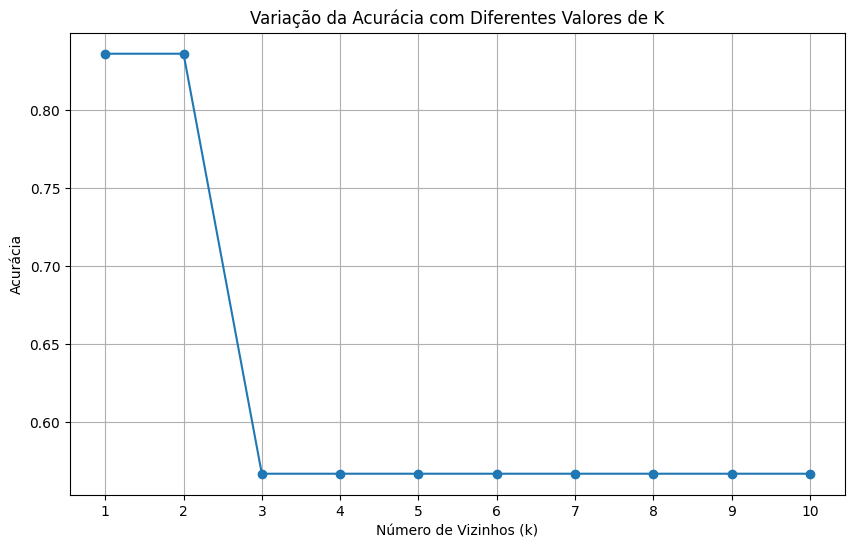

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(k, acc, marker='o')
plt.title('Variação da Acurácia com Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.xticks(k)
plt.grid(True)
plt.show()

## 2.2. MODEL ANALYSIS

### 2.2.1. KNN

In [ ]:
# Treinamento
knn_model = KNeighborsClassifier( n_neighbors=3 )
y_training = y_train['0'].ravel()
knn_model.fit( X_train, y_training )

# Dados de treinamento
yhat_train = knn_model.predict( X_train )
knn_treino = performance_model( 'KNN', y_train, yhat_train )

# Dados de Validação
yhat_val = knn_model.predict( X_val )
knn_val = performance_model( 'KNN', y_val, yhat_val )

# Dados de Teste
yhat_test = knn_model.predict( X_test )
knn_test = performance_model( 'KNN', y_test, yhat_test )

### 2.2.2. Decision Tree

In [ ]:
# Treinamento
tree_model = DecisionTreeClassifier( max_depth = 12)
y_training = y_train['0'].ravel()
tree_model.fit( X_train, y_training )

# Dados de treinamento
yhat_train = tree_model.predict( X_train )
tree_treino = performance_model( 'Decision Tree', y_train, yhat_train )

# Dados de Validação
yhat_val = tree_model.predict( X_val )
tree_val = performance_model( 'Decision Tree', y_val, yhat_val )

# Dados de Teste
yhat_test = tree_model.predict( X_test )
tree_test = performance_model( 'Decision Tree', y_test, yhat_test )


### 2.2.3. Random Forest

In [ ]:
# Treinamento
rf_model = RandomForestClassifier( n_estimators=1000, max_depth=100)
y_training = y_train['0'].ravel()
rf_model.fit( X_train, y_training )

# Dados de treinamento
yhat_train = rf_model.predict( X_train )
rf_treino = performance_model( 'Random Forest', y_train, yhat_train )

# Dados de Validação
yhat_val = rf_model.predict( X_val )
rf_val = performance_model( 'Random Forest', y_val, yhat_val )

# Dados de Teste
yhat_test = rf_model.predict( X_test )
rf_test = performance_model( 'Random Forest', y_test, yhat_test )

### 2.2.4. Logistic Regression

In [ ]:
# Treinamento
lg_model = LogisticRegression( C=hp['C'], solver=hp['solver'], max_iter=hp['max_iter'])
y_training = y_train['0'].ravel()
lg_model.fit( X_train, y_training )

# Dados de treinamento
yhat_train = lg_model.predict( X_train )
lg_treino = performance_model( 'Logistic Regression', y_train, yhat_train )

# Dados de Validação
yhat_val = lg_model.predict( X_val )
lg_val = performance_model( 'Logistic Regression', y_val, yhat_val )

# Dados de Teste
yhat_test = lg_model.predict( X_test )
lg_test = performance_model( 'Logistic Regression', y_test, yhat_test )


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2.2.5. Resultados

In [ ]:
# TREINO
modelling_result_treino = pd.concat( [ knn_treino, tree_treino, rf_treino, lg_treino  ] )
modelling_result_treino

,Model Name,Accuracy,Precision,Recall,F1-Score
0,KNN,0.832,0.812,0.797,0.805
0,Decision Tree,0.966,0.977,0.945,0.961
0,Random Forest,1.000,1.000,1.000,1.000
0,Logistic Regression,0.567,0.636,0.000,0.000


In [ ]:
# VALIDAÇÃO
modelling_result_val = pd.concat( [ knn_val, tree_val, rf_val, lg_val ] )
modelling_result_val

,Model Name,Accuracy,Precision,Recall,F1-Score
0,KNN,0.676,0.628,0.621,0.625
0,Decision Tree,0.952,0.959,0.929,0.943
0,Random Forest,0.965,0.974,0.945,0.959
0,Logistic Regression,0.567,0.750,0.000,0.000


In [ ]:
# TESTE
modelling_result_test = pd.concat( [ knn_test, tree_test, rf_test, lg_test ] )
modelling_result_test

,Model Name,Accuracy,Precision,Recall,F1-Score
0,KNN,0.672,0.630,0.612,0.621
0,Decision Tree,0.950,0.957,0.927,0.942
0,Random Forest,0.964,0.972,0.946,0.958
0,Logistic Regression,0.561,0.000,0.000,0.000


# <font color='blue'> 3.0. REGRESSÃO

## 0.0. IMPORTS

In [ ]:
# Treinamento
X_train_r = pd.read_csv('X_training (1).csv')
y_train_r = pd.read_csv('y_training (1).csv')

# Validação
X_val_r = pd.read_csv('X_validation (1).csv')
y_val_r = pd.read_csv('y_val (1).csv')

# Teste
X_test_r = pd.read_csv('X_test (1).csv')
y_test_r = pd.read_csv('y_test (1).csv')

## 3.1. MODEL TRAINING

### 3.1.1 Linear Regression

In [ ]:
# Treinamento do algoritmo
lr_model = LinearRegression()
y_training = y_train_r['song_popularity'].ravel()
lr_model.fit( X_train_r, y_training )

LinearRegression()

In [ ]:
yhat = lr_model.predict(X_val_r)
y_validation = y_val_r['song_popularity'].ravel()
r2_squared = np.round( mt.r2_score( y_val_r, yhat ), 5 )

In [ ]:
r2_squared

0.03992

### 3.1.2. Decision Tree Regressor

In [ ]:
max_depths = [None, 5, 10, 20]
k = []
r2 = []
cont = 0

In [ ]:
for max_depth in max_depths:
  # Treinar o modelo
  model = DecisionTreeRegressor( max_depth=max_depth )
  y_training = y_train_r['song_popularity'].ravel()
  model.fit( X_train_r, y_training )

  # Previsões
  yhat = model.predict( X_val_r )

  # Performance
  r2_squared = np.round( mt.r2_score( y_val_r, yhat ), 5 )

  cont+=1
  k.append(cont)
  r2.append(r2_squared)
  print(f"max_depth: {max_depth}, R2: {r2_squared}, K:{cont} ")

max_depth: None, R2: -0.30149, K:1 
max_depth: 5, R2: 0.06356, K:2 
max_depth: 10, R2: -0.00268, K:3 
max_depth: 20, R2: -0.27677, K:4 


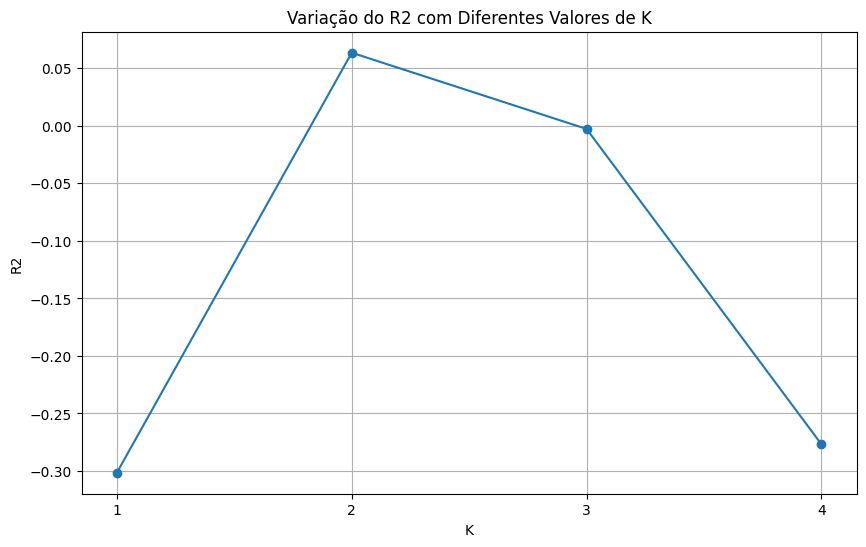

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(k, r2, marker='o')
plt.title('Variação do R2 com Diferentes Valores de K')
plt.xlabel('K')
plt.ylabel('R2')
plt.xticks(k)
plt.grid(True)
plt.show()

### 3.1.3. Random Forest Regressor

In [ ]:
n_estimatorss = [150,200,500]
max_depths = [20,30,50]
k = []
r2_score = []
cont = 0

In [ ]:
for n_estimators in n_estimatorss:
  for max_depth in max_depths:
    # MODEL
    model = RandomForestRegressor( n_estimators=n_estimators, max_depth=max_depth )
    y_training = y_train_r['song_popularity'].ravel()
    model.fit( X_train_r, y_training )

    yhat = model.predict( X_val_r )
    y_validation_r = y_val_r['song_popularity'].ravel()
    r2 = np.round( mt.r2_score( y_validation_r, yhat ), 2 )
    r2_score.append( r2 )

    cont+=1
    k.append( cont )

    print(f'Para n_estimators={n_estimators}, max_depth = {max_depth}, k={cont} o valor de R2 é {r2}')


Para n_estimators=150, max_depth = 20, k=1 o valor de R2 é 0.33
Para n_estimators=150, max_depth = 30, k=2 o valor de R2 é 0.34
Para n_estimators=150, max_depth = 50, k=3 o valor de R2 é 0.33
Para n_estimators=200, max_depth = 20, k=4 o valor de R2 é 0.33
Para n_estimators=200, max_depth = 30, k=5 o valor de R2 é 0.34
Para n_estimators=200, max_depth = 50, k=6 o valor de R2 é 0.33
Para n_estimators=500, max_depth = 20, k=7 o valor de R2 é 0.34
Para n_estimators=500, max_depth = 30, k=8 o valor de R2 é 0.34
Para n_estimators=500, max_depth = 50, k=9 o valor de R2 é 0.34


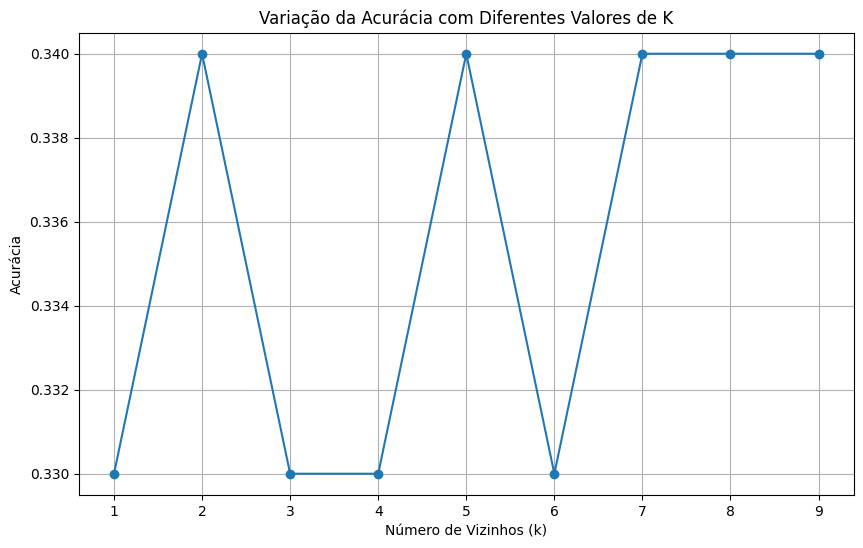

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(k, r2_score, marker='o')
plt.title('Variação da Acurácia com Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.xticks(k)
plt.grid(True)
plt.show()

### 3.1.4. Polinomial Regression

In [ ]:
degrees = [2,3,4,5]
k = []
r2_squared = []
cont = 0

In [ ]:
for degree in degrees:
  poly = PolynomialFeatures(degree)
  X_poly = poly.fit_transform(X_train_r)
  model = LinearRegression()
  y_training = y_train_r['song_popularity'].ravel()
  model.fit(X_poly, y_training)


  X_poly_val = poly.fit_transform(X_val_r)
  yhat = model.predict( X_poly_val )
  y_validation = y_val_r['song_popularity'].ravel()


  r2 = np.round( mt.r2_score( y_validation, yhat ), 5 )
  r2_squared.append(r2)
  cont+=1
  k.append(cont)
  print(f'No k={cont}, degree={degree}, R2={r2}')

No k=1, degree=2, R2=0.06648
No k=2, degree=3, R2=-0.04778
No k=3, degree=4, R2=-102.92363
No k=4, degree=5, R2=-224879.199


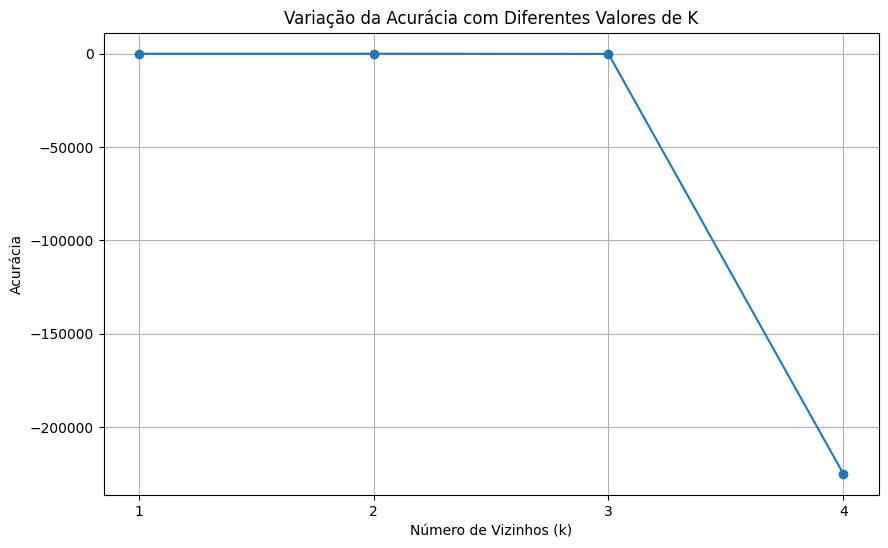

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(k, r2_squared, marker='o')
plt.title('Variação da Acurácia com Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.xticks(k)
plt.grid(True)
plt.show()

### 3.1.5. Linear Regression Lasso

In [ ]:
alphas = [0.01, 0.1, 1, 10]
max_iters = [50, 100, 200, 300]
cont = 0
k = []
r2 = []

In [ ]:
for alpha in alphas:
  for max_iter in max_iters:
    # Treinar o modelo
    model = Lasso(alpha=alpha, max_iter=max_iter)
    y_training = y_train_r['song_popularity'].ravel()
    model.fit( X_train_r, y_training )

    # Previsões
    yhat = model.predict( X_val_r )

    # Performance
    r2_squared = np.round( mt.r2_score( y_val_r, yhat ), 5 )

    cont+=1
    k.append(cont)
    r2.append(r2_squared)
    print(f"Alpha: {alpha}, Max Iter: {max_iter}, R2: {r2_squared}, K:{cont} ")



Alpha: 0.01, Max Iter: 50, R2: 0.03993, K:1 
Alpha: 0.01, Max Iter: 100, R2: 0.03993, K:2 
Alpha: 0.01, Max Iter: 200, R2: 0.03993, K:3 
Alpha: 0.01, Max Iter: 300, R2: 0.03993, K:4 
Alpha: 0.1, Max Iter: 50, R2: 0.0372, K:5 
Alpha: 0.1, Max Iter: 100, R2: 0.0372, K:6 
Alpha: 0.1, Max Iter: 200, R2: 0.0372, K:7 
Alpha: 0.1, Max Iter: 300, R2: 0.0372, K:8 
Alpha: 1, Max Iter: 50, R2: 0.00788, K:9 
Alpha: 1, Max Iter: 100, R2: 0.00788, K:10 
Alpha: 1, Max Iter: 200, R2: 0.00788, K:11 
Alpha: 1, Max Iter: 300, R2: 0.00788, K:12 
Alpha: 10, Max Iter: 50, R2: -0.0, K:13 
Alpha: 10, Max Iter: 100, R2: -0.0, K:14 
Alpha: 10, Max Iter: 200, R2: -0.0, K:15 
Alpha: 10, Max Iter: 300, R2: -0.0, K:16 


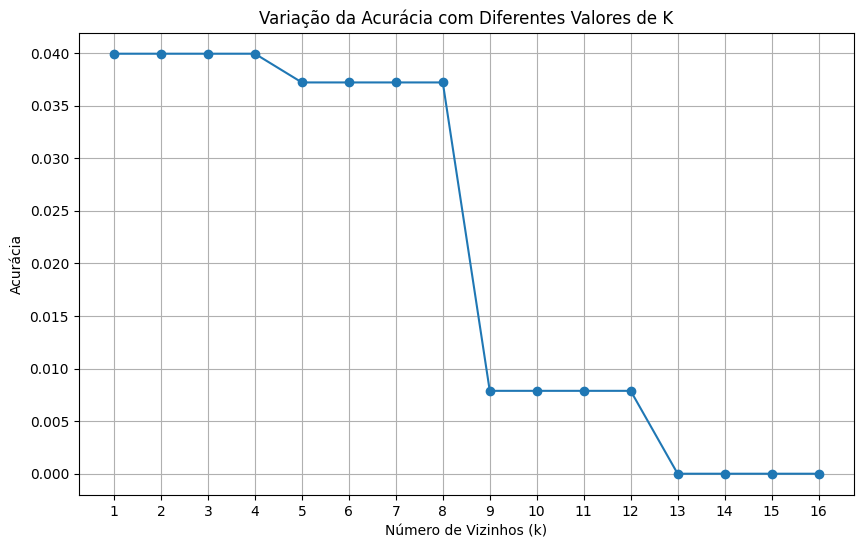

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(k, r2, marker='o')
plt.title('Variação da Acurácia com Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.xticks(k)
plt.grid(True)
plt.show()

### 3.1.6. Linear Regression Ridge

In [ ]:
alphas = [10,20]
max_iters = [50, 100, 200, 300]
cont = 0
k = []
r2 = []

In [ ]:
for alpha in alphas:
  for max_iter in max_iters:
    # Treinar o modelo
    model = Ridge(alpha=alpha, max_iter=max_iter)
    y_training = y_train_r['song_popularity'].ravel()
    model.fit( X_train_r, y_training )

    # Previsões
    yhat = model.predict( X_val_r )

    # Performance
    r2_squared = np.round( mt.r2_score( y_val_r, yhat ), 5 )

    cont+=1
    k.append(cont)
    r2.append(r2_squared)
    print(f"Alpha: {alpha}, Max Iter: {max_iter}, R2: {r2_squared}, K:{cont} ")

Alpha: 10, Max Iter: 50, R2: 0.03994, K:1 
Alpha: 10, Max Iter: 100, R2: 0.03994, K:2 
Alpha: 10, Max Iter: 200, R2: 0.03994, K:3 
Alpha: 10, Max Iter: 300, R2: 0.03994, K:4 
Alpha: 20, Max Iter: 50, R2: 0.03991, K:5 
Alpha: 20, Max Iter: 100, R2: 0.03991, K:6 
Alpha: 20, Max Iter: 200, R2: 0.03991, K:7 
Alpha: 20, Max Iter: 300, R2: 0.03991, K:8 


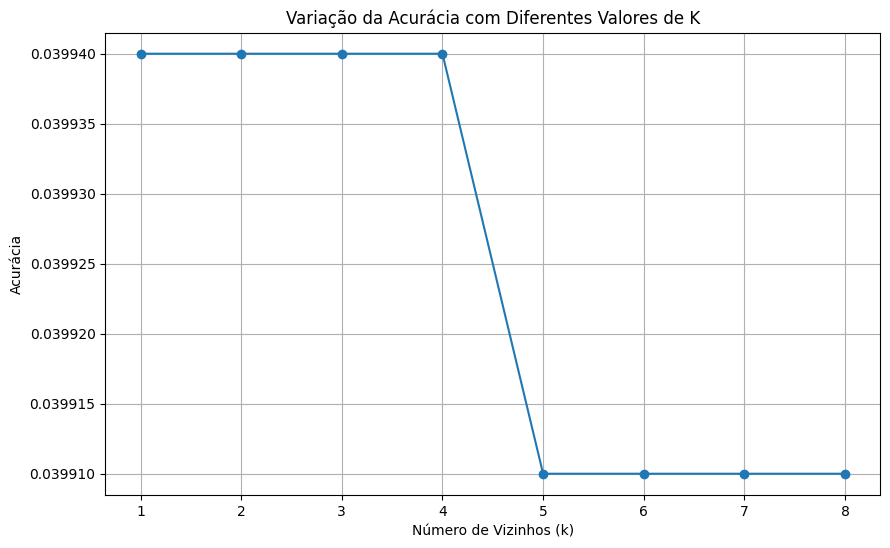

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(k, r2, marker='o')
plt.title('Variação da Acurácia com Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.xticks(k)
plt.grid(True)
plt.show()

### 3.1.7. Linear Regression Elastic Net

In [ ]:
alphas = [0.01, 0.1, 1, 10]
max_iters = [50, 100, 200, 300]
l1_ratios = [0.1, 0.5, 1.0]
r2_squared = []
k = []
cont = 0

In [ ]:
for max_iter in max_iters:
  for alpha in alphas:
    for l1_ratio in l1_ratios:

      # Crie uma instância do modelo ElasticNet com parâmetros apropriados
      model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=max_iter)
      y_training = y_train_r['song_popularity'].ravel()
      # Ajuste o modelo aos seus dados
      model.fit(X_train_r, y_training)

      # Faça previsões e avalie o desempenho
      yhat = model.predict(X_val_r)


      cont+=1
      r2 = np.round( mt.r2_score( y_val_r['song_popularity'].ravel(), yhat ), 2 )
      r2_squared.append(r2)
      k.append(cont)

      print(f'Para k={cont}, max_iter={max_iter}, alpha={alpha},l1_ratio={l1_ratio}, r2={r2} ')

Para k=1, max_iter=50, alpha=0.01,l1_ratio=0.1, r2=0.04 
Para k=2, max_iter=50, alpha=0.01,l1_ratio=0.5, r2=0.04 
Para k=3, max_iter=50, alpha=0.01,l1_ratio=1.0, r2=0.04 
Para k=4, max_iter=50, alpha=0.1,l1_ratio=0.1, r2=0.03 
Para k=5, max_iter=50, alpha=0.1,l1_ratio=0.5, r2=0.03 
Para k=6, max_iter=50, alpha=0.1,l1_ratio=1.0, r2=0.04 
Para k=7, max_iter=50, alpha=1,l1_ratio=0.1, r2=0.01 
Para k=8, max_iter=50, alpha=1,l1_ratio=0.5, r2=0.01 
Para k=9, max_iter=50, alpha=1,l1_ratio=1.0, r2=0.01 
Para k=10, max_iter=50, alpha=10,l1_ratio=0.1, r2=0.0 
Para k=11, max_iter=50, alpha=10,l1_ratio=0.5, r2=-0.0 
Para k=12, max_iter=50, alpha=10,l1_ratio=1.0, r2=-0.0 
Para k=13, max_iter=100, alpha=0.01,l1_ratio=0.1, r2=0.04 
Para k=14, max_iter=100, alpha=0.01,l1_ratio=0.5, r2=0.04 
Para k=15, max_iter=100, alpha=0.01,l1_ratio=1.0, r2=0.04 
Para k=16, max_iter=100, alpha=0.1,l1_ratio=0.1, r2=0.03 
Para k=17, max_iter=100, alpha=0.1,l1_ratio=0.5, r2=0.03 
Para k=18, max_iter=100, alpha=0.1,l1_r

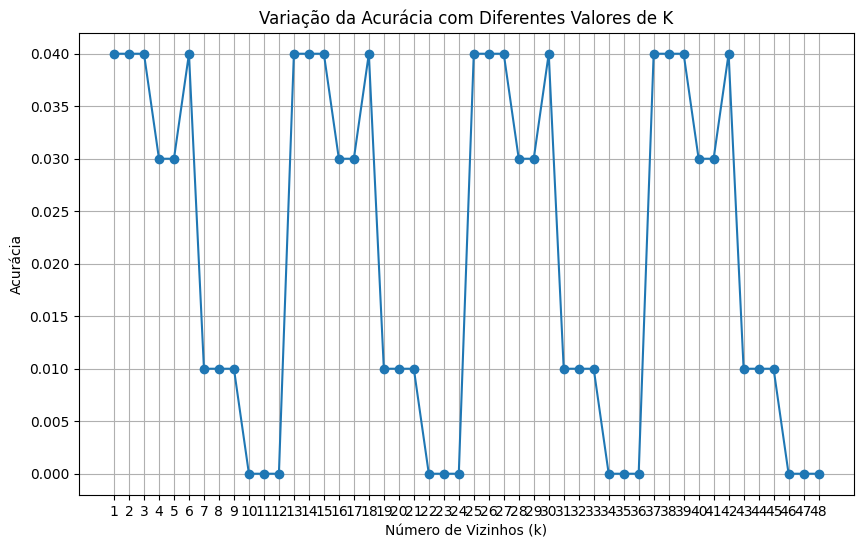

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(k, r2_squared, marker='o')
plt.title('Variação da Acurácia com Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.xticks(k)
plt.grid(True)
plt.show()

### 3.1.8. Polinomial Regression Lasso

In [ ]:
degrees = [2,3,4,5]
alphas = [0.01, 0.1, 1, 10]
max_iters = [50, 100, 200, 300]
r2_squared = []
k = []
cont = 0

In [ ]:
for degree in degrees:
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train_r)
  X_test_poly = poly.transform(X_val_r)

  for max_iter in max_iters:
    for alpha in alphas:
      lasso_model = Lasso(alpha=alpha, max_iter=max_iter)
      lasso_model.fit(X_train_poly, y_train_r['song_popularity'].ravel())

      # Faça previsões no conjunto de teste
      yhat = lasso_model.predict(X_test_poly)

      cont+=1
      r2 = np.round( mt.r2_score( y_val_r['song_popularity'].ravel(), yhat ), 2 )
      r2_squared.append(r2)
      k.append(cont)

      print(f'Para k={cont}, Degree={degree}, alpha={alpha}, max_iter={max_iter}, R2={r2}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.931e+03, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=1, Degree=2, alpha=0.01, max_iter=50, R2=0.07
Para k=2, Degree=2, alpha=0.1, max_iter=50, R2=0.06
Para k=3, Degree=2, alpha=1, max_iter=50, R2=0.01
Para k=4, Degree=2, alpha=10, max_iter=50, R2=-0.0
Para k=5, Degree=2, alpha=0.01, max_iter=100, R2=0.07


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.643e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=6, Degree=2, alpha=0.1, max_iter=100, R2=0.06
Para k=7, Degree=2, alpha=1, max_iter=100, R2=0.01
Para k=8, Degree=2, alpha=10, max_iter=100, R2=-0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.786e+04, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=9, Degree=2, alpha=0.01, max_iter=200, R2=0.07
Para k=10, Degree=2, alpha=0.1, max_iter=200, R2=0.06
Para k=11, Degree=2, alpha=1, max_iter=200, R2=0.01
Para k=12, Degree=2, alpha=10, max_iter=200, R2=-0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.000e+02, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=13, Degree=2, alpha=0.01, max_iter=300, R2=0.07
Para k=14, Degree=2, alpha=0.1, max_iter=300, R2=0.06
Para k=15, Degree=2, alpha=1, max_iter=300, R2=0.01
Para k=16, Degree=2, alpha=10, max_iter=300, R2=-0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.174e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=17, Degree=3, alpha=0.01, max_iter=50, R2=-0.02


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.685e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=18, Degree=3, alpha=0.1, max_iter=50, R2=0.06


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.171e+03, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=19, Degree=3, alpha=1, max_iter=50, R2=0.01
Para k=20, Degree=3, alpha=10, max_iter=50, R2=0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.206e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=21, Degree=3, alpha=0.01, max_iter=100, R2=-0.02


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.524e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=22, Degree=3, alpha=0.1, max_iter=100, R2=0.06
Para k=23, Degree=3, alpha=1, max_iter=100, R2=0.01
Para k=24, Degree=3, alpha=10, max_iter=100, R2=0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.219e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=25, Degree=3, alpha=0.01, max_iter=200, R2=-0.02


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.797e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=26, Degree=3, alpha=0.1, max_iter=200, R2=0.06
Para k=27, Degree=3, alpha=1, max_iter=200, R2=0.01
Para k=28, Degree=3, alpha=10, max_iter=200, R2=0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.234e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=29, Degree=3, alpha=0.01, max_iter=300, R2=-0.02


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.155e+03, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=30, Degree=3, alpha=0.1, max_iter=300, R2=0.06
Para k=31, Degree=3, alpha=1, max_iter=300, R2=0.01
Para k=32, Degree=3, alpha=10, max_iter=300, R2=0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.249e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=33, Degree=4, alpha=0.01, max_iter=50, R2=-0.66


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.357e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=34, Degree=4, alpha=0.1, max_iter=50, R2=0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.174e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=35, Degree=4, alpha=1, max_iter=50, R2=0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=36, Degree=4, alpha=10, max_iter=50, R2=-0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.233e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=37, Degree=4, alpha=0.01, max_iter=100, R2=-1.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.362e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=38, Degree=4, alpha=0.1, max_iter=100, R2=-0.04


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.221e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=39, Degree=4, alpha=1, max_iter=100, R2=0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.606e+04, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=40, Degree=4, alpha=10, max_iter=100, R2=-0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.219e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=41, Degree=4, alpha=0.01, max_iter=200, R2=-1.56


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.340e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=42, Degree=4, alpha=0.1, max_iter=200, R2=-0.03


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.570e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=43, Degree=4, alpha=1, max_iter=200, R2=-0.0
Para k=44, Degree=4, alpha=10, max_iter=200, R2=-0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.237e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=45, Degree=4, alpha=0.01, max_iter=300, R2=-1.92


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.333e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=46, Degree=4, alpha=0.1, max_iter=300, R2=-0.03


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.017e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=47, Degree=4, alpha=1, max_iter=300, R2=-0.01
Para k=48, Degree=4, alpha=10, max_iter=300, R2=-0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.217e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=49, Degree=5, alpha=0.01, max_iter=50, R2=-8.12


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.360e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=50, Degree=5, alpha=0.1, max_iter=50, R2=-0.11


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.487e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=51, Degree=5, alpha=1, max_iter=50, R2=-0.54


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.420e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=52, Degree=5, alpha=10, max_iter=50, R2=-0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.210e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=53, Degree=5, alpha=0.01, max_iter=100, R2=-9.27


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.359e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=54, Degree=5, alpha=0.1, max_iter=100, R2=-0.37


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.486e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=55, Degree=5, alpha=1, max_iter=100, R2=-0.85


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.981e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=56, Degree=5, alpha=10, max_iter=100, R2=-0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.204e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=57, Degree=5, alpha=0.01, max_iter=200, R2=-13.09


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.358e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=58, Degree=5, alpha=0.1, max_iter=200, R2=-0.9


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.484e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=59, Degree=5, alpha=1, max_iter=200, R2=-1.37


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.634e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=60, Degree=5, alpha=10, max_iter=200, R2=-0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.201e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=61, Degree=5, alpha=0.01, max_iter=300, R2=-22.84


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.361e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=62, Degree=5, alpha=0.1, max_iter=300, R2=-1.34


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.482e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=63, Degree=5, alpha=1, max_iter=300, R2=-1.66
Para k=64, Degree=5, alpha=10, max_iter=300, R2=-0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.425e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Crie um DataFrame com as listas
data = {'k': k, 'r2_squared': r2_squared}
df = pd.DataFrame(data)
df1 = df[df['r2_squared'] >=0.0]
df2 = df1.sort_values('r2_squared',ascending=False).head(3).reset_index()

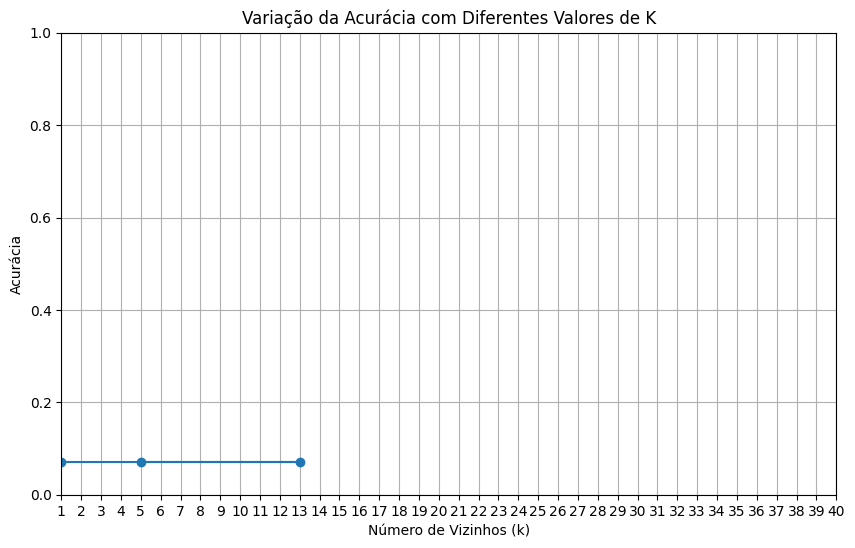

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot('k', 'r2_squared', marker='o', data=df2)
plt.title('Variação da Acurácia com Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.xticks(k)
plt.xlim(1, 40)
plt.ylim(0.0,1)
plt.grid(True)
plt.show()

### 3.1.9. Polinomial Regression Ridge

In [ ]:
degrees = [2,3,4]
alphas = [0.01, 0.1, 1, 10]
max_iters = [50, 100, 200, 300]
r2_squared = []
k = []
cont = 0

In [ ]:
for degree in degrees:
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train_r)
  X_test_poly = poly.transform(X_val_r)

  for max_iter in max_iters:
    for alpha in alphas:
      ridge_model = Ridge(alpha=alpha, max_iter=max_iter)
      ridge_model.fit(X_train_poly, y_train_r['song_popularity'].ravel())

      # Faça previsões no conjunto de teste
      yhat = ridge_model.predict(X_test_poly)

      cont+=1
      r2 = np.round( mt.r2_score( y_val_r['song_popularity'].ravel(), yhat ), 2 )
      r2_squared.append(r2)
      k.append(cont)

      print(f'Para k={cont}, Degree={degree}, alpha={alpha}, max_iter={max_iter}, R2={r2}')

Para k=1, Degree=2, alpha=0.01, max_iter=50, R2=0.07
Para k=2, Degree=2, alpha=0.1, max_iter=50, R2=0.07
Para k=3, Degree=2, alpha=1, max_iter=50, R2=0.07
Para k=4, Degree=2, alpha=10, max_iter=50, R2=0.07
Para k=5, Degree=2, alpha=0.01, max_iter=100, R2=0.07
Para k=6, Degree=2, alpha=0.1, max_iter=100, R2=0.07
Para k=7, Degree=2, alpha=1, max_iter=100, R2=0.07
Para k=8, Degree=2, alpha=10, max_iter=100, R2=0.07
Para k=9, Degree=2, alpha=0.01, max_iter=200, R2=0.07
Para k=10, Degree=2, alpha=0.1, max_iter=200, R2=0.07
Para k=11, Degree=2, alpha=1, max_iter=200, R2=0.07
Para k=12, Degree=2, alpha=10, max_iter=200, R2=0.07
Para k=13, Degree=2, alpha=0.01, max_iter=300, R2=0.07
Para k=14, Degree=2, alpha=0.1, max_iter=300, R2=0.07
Para k=15, Degree=2, alpha=1, max_iter=300, R2=0.07
Para k=16, Degree=2, alpha=10, max_iter=300, R2=0.07
Para k=17, Degree=3, alpha=0.01, max_iter=50, R2=-0.03
Para k=18, Degree=3, alpha=0.1, max_iter=50, R2=-0.05
Para k=19, Degree=3, alpha=1, max_iter=50, R2=-0

In [ ]:
# Crie um DataFrame com as listas
data = {'k': k, 'r2_squared': r2_squared}
df = pd.DataFrame(data)
df1 = df[df['r2_squared'] >=0]
df2 = df1.sort_values('r2_squared',ascending=False).head(10).reset_index()

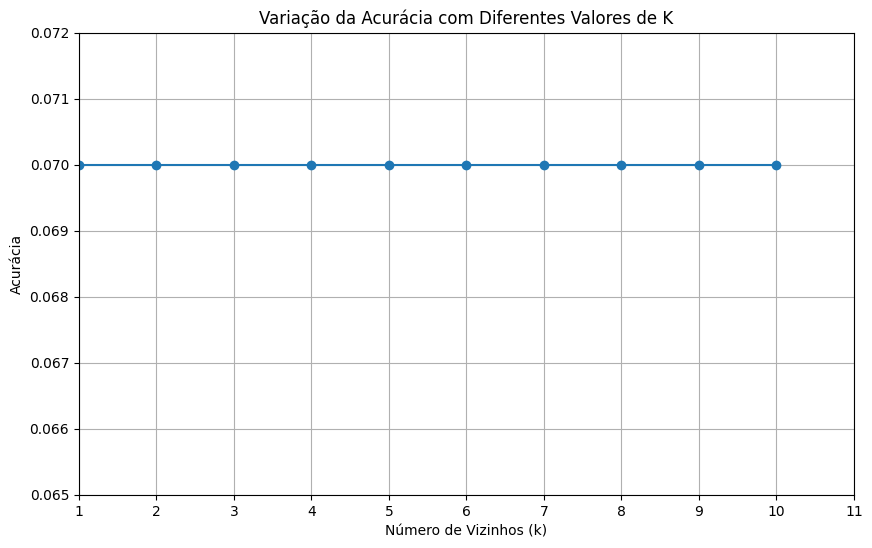

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot('k', 'r2_squared', marker='o', data=df2)
plt.title('Variação da Acurácia com Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.xticks(k)
plt.xlim(1, 11)
plt.ylim(0.065,0.072)
plt.grid(True)
plt.show()

### 3.1.10. Polinomial Regression Elastic Net

In [ ]:
degrees = [2,3,4]
alphas = [0.01, 0.1, 1, 10]
max_iters = [50, 100, 200, 300]
l1_ratios = [0.1, 0.5, 1.0]
r2_squared = []
k = []
cont = 0

In [ ]:
for degree in degrees:
  for max_iter in max_iters:
    for alpha in alphas:
      for l1_ratio in l1_ratios:

        # Crie uma instância do modelo ElasticNet com parâmetros apropriados
        model = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=max_iter ))
        y_training = y_train_r['song_popularity'].ravel()
        # Ajuste o modelo aos seus dados
        model.fit(X_train_r, y_training)

        # Faça previsões e avalie o desempenho
        yhat = model.predict(X_val_r)


        cont+=1
        r2 = np.round( mt.r2_score( y_val_r['song_popularity'].ravel(), yhat ), 2 )
        r2_squared.append(r2)
        k.append(cont)

        print(f'Para k={cont}, max_iter={max_iter}, alpha={alpha},l1_ratio={l1_ratio}, r2={r2}, degree={degree} ')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.075e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.603e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=1, max_iter=50, alpha=0.01,l1_ratio=0.1, r2=0.06, degree=2 
Para k=2, max_iter=50, alpha=0.01,l1_ratio=0.5, r2=0.06, degree=2 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.224e+03, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=3, max_iter=50, alpha=0.01,l1_ratio=1.0, r2=0.07, degree=2 
Para k=4, max_iter=50, alpha=0.1,l1_ratio=0.1, r2=0.05, degree=2 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.766e+03, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.931e+03, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=5, max_iter=50, alpha=0.1,l1_ratio=0.5, r2=0.05, degree=2 
Para k=6, max_iter=50, alpha=0.1,l1_ratio=1.0, r2=0.06, degree=2 
Para k=7, max_iter=50, alpha=1,l1_ratio=0.1, r2=0.02, degree=2 
Para k=8, max_iter=50, alpha=1,l1_ratio=0.5, r2=0.01, degree=2 
Para k=9, max_iter=50, alpha=1,l1_ratio=1.0, r2=0.01, degree=2 
Para k=10, max_iter=50, alpha=10,l1_ratio=0.1, r2=0.0, degree=2 
Para k=11, max_iter=50, alpha=10,l1_ratio=0.5, r2=-0.0, degree=2 
Para k=12, max_iter=50, alpha=10,l1_ratio=1.0, r2=-0.0, degree=2 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.031e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=13, max_iter=100, alpha=0.01,l1_ratio=0.1, r2=0.06, degree=2 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.175e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=14, max_iter=100, alpha=0.01,l1_ratio=0.5, r2=0.06, degree=2 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.643e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=15, max_iter=100, alpha=0.01,l1_ratio=1.0, r2=0.07, degree=2 
Para k=16, max_iter=100, alpha=0.1,l1_ratio=0.1, r2=0.05, degree=2 
Para k=17, max_iter=100, alpha=0.1,l1_ratio=0.5, r2=0.05, degree=2 
Para k=18, max_iter=100, alpha=0.1,l1_ratio=1.0, r2=0.06, degree=2 
Para k=19, max_iter=100, alpha=1,l1_ratio=0.1, r2=0.02, degree=2 
Para k=20, max_iter=100, alpha=1,l1_ratio=0.5, r2=0.01, degree=2 
Para k=21, max_iter=100, alpha=1,l1_ratio=1.0, r2=0.01, degree=2 
Para k=22, max_iter=100, alpha=10,l1_ratio=0.1, r2=0.0, degree=2 
Para k=23, max_iter=100, alpha=10,l1_ratio=0.5, r2=-0.0, degree=2 
Para k=24, max_iter=100, alpha=10,l1_ratio=1.0, r2=-0.0, degree=2 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.147e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=25, max_iter=200, alpha=0.01,l1_ratio=0.1, r2=0.06, degree=2 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.950e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=26, max_iter=200, alpha=0.01,l1_ratio=0.5, r2=0.06, degree=2 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.786e+04, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=27, max_iter=200, alpha=0.01,l1_ratio=1.0, r2=0.07, degree=2 
Para k=28, max_iter=200, alpha=0.1,l1_ratio=0.1, r2=0.05, degree=2 
Para k=29, max_iter=200, alpha=0.1,l1_ratio=0.5, r2=0.05, degree=2 
Para k=30, max_iter=200, alpha=0.1,l1_ratio=1.0, r2=0.06, degree=2 
Para k=31, max_iter=200, alpha=1,l1_ratio=0.1, r2=0.02, degree=2 
Para k=32, max_iter=200, alpha=1,l1_ratio=0.5, r2=0.01, degree=2 
Para k=33, max_iter=200, alpha=1,l1_ratio=1.0, r2=0.01, degree=2 
Para k=34, max_iter=200, alpha=10,l1_ratio=0.1, r2=0.0, degree=2 
Para k=35, max_iter=200, alpha=10,l1_ratio=0.5, r2=-0.0, degree=2 
Para k=36, max_iter=200, alpha=10,l1_ratio=1.0, r2=-0.0, degree=2 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.986e+03, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=37, max_iter=300, alpha=0.01,l1_ratio=0.1, r2=0.06, degree=2 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.489e+04, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=38, max_iter=300, alpha=0.01,l1_ratio=0.5, r2=0.06, degree=2 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.000e+02, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=39, max_iter=300, alpha=0.01,l1_ratio=1.0, r2=0.07, degree=2 
Para k=40, max_iter=300, alpha=0.1,l1_ratio=0.1, r2=0.05, degree=2 
Para k=41, max_iter=300, alpha=0.1,l1_ratio=0.5, r2=0.05, degree=2 
Para k=42, max_iter=300, alpha=0.1,l1_ratio=1.0, r2=0.06, degree=2 
Para k=43, max_iter=300, alpha=1,l1_ratio=0.1, r2=0.02, degree=2 
Para k=44, max_iter=300, alpha=1,l1_ratio=0.5, r2=0.01, degree=2 
Para k=45, max_iter=300, alpha=1,l1_ratio=1.0, r2=0.01, degree=2 
Para k=46, max_iter=300, alpha=10,l1_ratio=0.1, r2=0.0, degree=2 
Para k=47, max_iter=300, alpha=10,l1_ratio=0.5, r2=-0.0, degree=2 
Para k=48, max_iter=300, alpha=10,l1_ratio=1.0, r2=-0.0, degree=2 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.276e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=49, max_iter=50, alpha=0.01,l1_ratio=0.1, r2=0.02, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.240e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=50, max_iter=50, alpha=0.01,l1_ratio=0.5, r2=0.01, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.174e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=51, max_iter=50, alpha=0.01,l1_ratio=1.0, r2=-0.02, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.174e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=52, max_iter=50, alpha=0.1,l1_ratio=0.1, r2=0.05, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.007e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=53, max_iter=50, alpha=0.1,l1_ratio=0.5, r2=0.05, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.685e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=54, max_iter=50, alpha=0.1,l1_ratio=1.0, r2=0.06, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.056e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=55, max_iter=50, alpha=1,l1_ratio=0.1, r2=0.03, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.706e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=56, max_iter=50, alpha=1,l1_ratio=0.5, r2=0.01, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.171e+03, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=57, max_iter=50, alpha=1,l1_ratio=1.0, r2=0.01, degree=3 
Para k=58, max_iter=50, alpha=10,l1_ratio=0.1, r2=0.0, degree=3 
Para k=59, max_iter=50, alpha=10,l1_ratio=0.5, r2=0.0, degree=3 
Para k=60, max_iter=50, alpha=10,l1_ratio=1.0, r2=0.0, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.281e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=61, max_iter=100, alpha=0.01,l1_ratio=0.1, r2=0.01, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.244e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=62, max_iter=100, alpha=0.01,l1_ratio=0.5, r2=0.01, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.206e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=63, max_iter=100, alpha=0.01,l1_ratio=1.0, r2=-0.02, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.285e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=64, max_iter=100, alpha=0.1,l1_ratio=0.1, r2=0.04, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.833e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=65, max_iter=100, alpha=0.1,l1_ratio=0.5, r2=0.05, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.524e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=66, max_iter=100, alpha=0.1,l1_ratio=1.0, r2=0.06, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.049e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=67, max_iter=100, alpha=1,l1_ratio=0.1, r2=0.03, degree=3 
Para k=68, max_iter=100, alpha=1,l1_ratio=0.5, r2=0.01, degree=3 
Para k=69, max_iter=100, alpha=1,l1_ratio=1.0, r2=0.01, degree=3 
Para k=70, max_iter=100, alpha=10,l1_ratio=0.1, r2=0.0, degree=3 
Para k=71, max_iter=100, alpha=10,l1_ratio=0.5, r2=0.0, degree=3 
Para k=72, max_iter=100, alpha=10,l1_ratio=1.0, r2=0.0, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.283e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=73, max_iter=200, alpha=0.01,l1_ratio=0.1, r2=0.0, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.265e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=74, max_iter=200, alpha=0.01,l1_ratio=0.5, r2=0.0, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.219e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=75, max_iter=200, alpha=0.01,l1_ratio=1.0, r2=-0.02, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.279e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=76, max_iter=200, alpha=0.1,l1_ratio=0.1, r2=0.04, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.863e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=77, max_iter=200, alpha=0.1,l1_ratio=0.5, r2=0.05, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.797e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=78, max_iter=200, alpha=0.1,l1_ratio=1.0, r2=0.06, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.357e+03, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=79, max_iter=200, alpha=1,l1_ratio=0.1, r2=0.03, degree=3 
Para k=80, max_iter=200, alpha=1,l1_ratio=0.5, r2=0.01, degree=3 
Para k=81, max_iter=200, alpha=1,l1_ratio=1.0, r2=0.01, degree=3 
Para k=82, max_iter=200, alpha=10,l1_ratio=0.1, r2=0.0, degree=3 
Para k=83, max_iter=200, alpha=10,l1_ratio=0.5, r2=0.0, degree=3 
Para k=84, max_iter=200, alpha=10,l1_ratio=1.0, r2=0.0, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.283e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=85, max_iter=300, alpha=0.01,l1_ratio=0.1, r2=-0.01, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.270e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=86, max_iter=300, alpha=0.01,l1_ratio=0.5, r2=-0.01, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.234e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=87, max_iter=300, alpha=0.01,l1_ratio=1.0, r2=-0.02, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.150e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=88, max_iter=300, alpha=0.1,l1_ratio=0.1, r2=0.04, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.700e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=89, max_iter=300, alpha=0.1,l1_ratio=0.5, r2=0.05, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.155e+03, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=90, max_iter=300, alpha=0.1,l1_ratio=1.0, r2=0.06, degree=3 
Para k=91, max_iter=300, alpha=1,l1_ratio=0.1, r2=0.03, degree=3 
Para k=92, max_iter=300, alpha=1,l1_ratio=0.5, r2=0.01, degree=3 
Para k=93, max_iter=300, alpha=1,l1_ratio=1.0, r2=0.01, degree=3 
Para k=94, max_iter=300, alpha=10,l1_ratio=0.1, r2=0.0, degree=3 
Para k=95, max_iter=300, alpha=10,l1_ratio=0.5, r2=0.0, degree=3 
Para k=96, max_iter=300, alpha=10,l1_ratio=1.0, r2=0.0, degree=3 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.232e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=97, max_iter=50, alpha=0.01,l1_ratio=0.1, r2=-0.36, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.245e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=98, max_iter=50, alpha=0.01,l1_ratio=0.5, r2=-0.45, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.249e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=99, max_iter=50, alpha=0.01,l1_ratio=1.0, r2=-0.66, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.321e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=100, max_iter=50, alpha=0.1,l1_ratio=0.1, r2=0.05, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.353e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=101, max_iter=50, alpha=0.1,l1_ratio=0.5, r2=-0.02, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.357e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=102, max_iter=50, alpha=0.1,l1_ratio=1.0, r2=0.01, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.416e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=103, max_iter=50, alpha=1,l1_ratio=0.1, r2=-0.07, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.182e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=104, max_iter=50, alpha=1,l1_ratio=0.5, r2=-0.01, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.174e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=105, max_iter=50, alpha=1,l1_ratio=1.0, r2=0.01, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.186e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=106, max_iter=50, alpha=10,l1_ratio=0.1, r2=0.01, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=107, max_iter=50, alpha=10,l1_ratio=0.5, r2=-0.0, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=108, max_iter=50, alpha=10,l1_ratio=1.0, r2=-0.0, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.227e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=109, max_iter=100, alpha=0.01,l1_ratio=0.1, r2=-0.78, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.197e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=110, max_iter=100, alpha=0.01,l1_ratio=0.5, r2=-0.73, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.233e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=111, max_iter=100, alpha=0.01,l1_ratio=1.0, r2=-1.01, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.318e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=112, max_iter=100, alpha=0.1,l1_ratio=0.1, r2=0.04, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.356e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=113, max_iter=100, alpha=0.1,l1_ratio=0.5, r2=-0.06, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.362e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=114, max_iter=100, alpha=0.1,l1_ratio=1.0, r2=-0.04, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.358e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=115, max_iter=100, alpha=1,l1_ratio=0.1, r2=-0.07, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.381e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=116, max_iter=100, alpha=1,l1_ratio=0.5, r2=-0.02, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.221e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=117, max_iter=100, alpha=1,l1_ratio=1.0, r2=0.01, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.098e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=118, max_iter=100, alpha=10,l1_ratio=0.1, r2=0.01, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.155e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=119, max_iter=100, alpha=10,l1_ratio=0.5, r2=-0.01, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.606e+04, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=120, max_iter=100, alpha=10,l1_ratio=1.0, r2=-0.01, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.205e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=121, max_iter=200, alpha=0.01,l1_ratio=0.1, r2=-1.23, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.214e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=122, max_iter=200, alpha=0.01,l1_ratio=0.5, r2=-1.09, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.219e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=123, max_iter=200, alpha=0.01,l1_ratio=1.0, r2=-1.56, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.319e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=124, max_iter=200, alpha=0.1,l1_ratio=0.1, r2=0.02, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.355e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=125, max_iter=200, alpha=0.1,l1_ratio=0.5, r2=-0.1, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.340e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=126, max_iter=200, alpha=0.1,l1_ratio=1.0, r2=-0.03, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.406e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=127, max_iter=200, alpha=1,l1_ratio=0.1, r2=-0.08, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.362e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=128, max_iter=200, alpha=1,l1_ratio=0.5, r2=-0.03, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.570e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=129, max_iter=200, alpha=1,l1_ratio=1.0, r2=-0.0, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.017e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=130, max_iter=200, alpha=10,l1_ratio=0.1, r2=0.0, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.339e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=131, max_iter=200, alpha=10,l1_ratio=0.5, r2=-0.01, degree=4 
Para k=132, max_iter=200, alpha=10,l1_ratio=1.0, r2=-0.01, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.223e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=133, max_iter=300, alpha=0.01,l1_ratio=0.1, r2=-1.5, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.235e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=134, max_iter=300, alpha=0.01,l1_ratio=0.5, r2=-1.34, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.237e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=135, max_iter=300, alpha=0.01,l1_ratio=1.0, r2=-1.92, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.319e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=136, max_iter=300, alpha=0.1,l1_ratio=0.1, r2=0.0, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.350e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=137, max_iter=300, alpha=0.1,l1_ratio=0.5, r2=-0.09, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.333e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=138, max_iter=300, alpha=0.1,l1_ratio=1.0, r2=-0.03, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.410e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=139, max_iter=300, alpha=1,l1_ratio=0.1, r2=-0.08, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.323e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=140, max_iter=300, alpha=1,l1_ratio=0.5, r2=-0.04, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.017e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=141, max_iter=300, alpha=1,l1_ratio=1.0, r2=-0.01, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.937e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=142, max_iter=300, alpha=10,l1_ratio=0.1, r2=0.0, degree=4 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.522e+03, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


Para k=143, max_iter=300, alpha=10,l1_ratio=0.5, r2=-0.01, degree=4 
Para k=144, max_iter=300, alpha=10,l1_ratio=1.0, r2=-0.01, degree=4 


In [ ]:
# Crie um DataFrame com as listas
data = {'k': k, 'r2_squared': r2_squared}
df = pd.DataFrame(data)
df1 = df[df['r2_squared'] >=0.0]
df2 = df1.sort_values('r2_squared',ascending=False).head(1).reset_index()

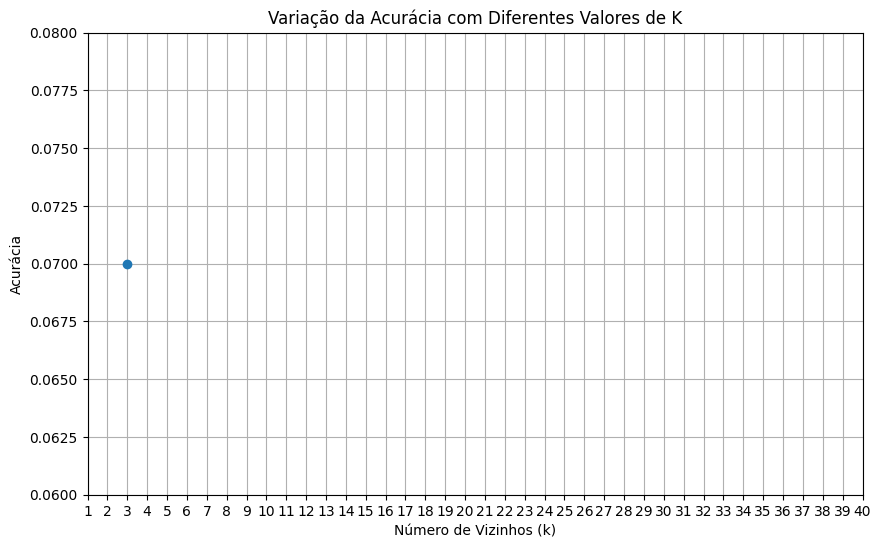

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot('k', 'r2_squared', marker='o', data=df2)
plt.title('Variação da Acurácia com Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.xticks(k)
plt.xlim(1, 40)
plt.ylim(0.06,max(r2_squared)+0.01)
plt.grid(True)
plt.show()

## 3.2. MODEL ANALYSIS

In [ ]:
y_training = y_train_r['song_popularity'].values.ravel()
y_validation = y_val_r['song_popularity'].values.ravel()
y_teste = y_test_r['song_popularity'].values.ravel()

### 3.1.1 Linear Regression

In [ ]:
# Treinar o modelo
model = LinearRegression()
model.fit( X_train_r, y_training )

# Previsões Treinamento
yhat = model.predict( X_train_r )
p1_train = performance_regressao( 'Linear Regression', y_training, yhat )

# Previsões Validação
yhat = model.predict( X_val_r )
p1_val = performance_regressao( 'Linear Regression', y_validation, yhat )

# Previsões Treinamento
yhat = model.predict( X_test_r )
p1_test = performance_regressao( 'Linear Regression', y_teste, yhat )

### 3.1.2. Decision Tree Regressor

In [ ]:
# Treinar o modelo
model = DecisionTreeRegressor( max_depth=5 )
model.fit( X_train_r, y_training )

# Previsões Treinamento
yhat = model.predict( X_train_r )
p2_train = performance_regressao( 'Decision Tree Regressor', y_training, yhat )

# Previsões Validação
yhat = model.predict( X_val_r )
p2_val = performance_regressao( 'Decision Tree Regressor', y_validation, yhat )

# Previsões Treinamento
yhat = model.predict( X_test_r )
p2_test = performance_regressao( 'Decision Tree Regressor', y_teste, yhat )

### 3.1.3. Random Forest Regressor

In [ ]:
# Treinar o modelo
model = RandomForestRegressor( n_estimators=150, max_depth=50 )
model.fit( X_train_r, y_training )

# Previsões Treinamento
yhat = model.predict( X_train_r )
p3_train = performance_regressao( 'Random Forest Regressor', y_training, yhat )

# Previsões Validação
yhat = model.predict( X_val_r )
p3_val = performance_regressao( 'Random Forest Regressor', y_validation, yhat )

# Previsões Treinamento
yhat = model.predict( X_test_r )
p3_test = performance_regressao( 'Random Forest Regressor', y_teste, yhat )

### 3.1.4. Polinomial Regression

In [ ]:
# Treinar o modelo
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_train_r)
model = LinearRegression()
model.fit( X_poly, y_training )

# Previsões Treinamento
X_poly = poly.fit_transform(X_train_r)
yhat = model.predict( X_poly )
p4_train = performance_regressao( 'Polinomial Regression', y_training, yhat )

# Previsões Validação
X_poly = poly.fit_transform(X_val_r)
yhat = model.predict( X_poly )
p4_val = performance_regressao( 'Polinomial Regression', y_validation, yhat )

# Previsões Treinamento
X_poly = poly.fit_transform(X_test_r)
yhat = model.predict( X_poly )
p4_test = performance_regressao( 'Polinomial Regression', y_teste, yhat )

### 3.1.5. Linear Regression Lasso

In [ ]:
# Treinar o modelo
model = Lasso(alpha=0.01, max_iter=50)
model.fit( X_train_r, y_training )

# Previsões Treinamento
yhat = model.predict( X_train_r )
p5_train = performance_regressao( 'Linear Regression Lasso', y_training, yhat )

# Previsões Validação
yhat = model.predict( X_val_r )
p5_val = performance_regressao( 'Linear Regression Lasso', y_validation, yhat )

# Previsões Treinamento
yhat = model.predict( X_test_r )
p5_test = performance_regressao( 'Linear Regression Lasso', y_teste, yhat )

### 3.1.6. Linear Regression Ridge

In [ ]:
# Treinar o modelo
model = Ridge(alpha=10, max_iter=50)
model.fit( X_train_r, y_training )

# Previsões Treinamento
yhat = model.predict( X_train_r )
p6_train = performance_regressao( 'Linear Regression Ridge', y_training, yhat )

# Previsões Validação
yhat = model.predict( X_val_r )
p6_val = performance_regressao( 'Linear Regression Ridge', y_validation, yhat )

# Previsões Treinamento
yhat = model.predict( X_test_r )
p6_test = performance_regressao( 'Linear Regression Ridge', y_teste, yhat )

### 3.1.7. Linear Regression Elastic Net

In [ ]:
# Treinar o modelo
model = ElasticNet(alpha=0.1, l1_ratio=0.1, max_iter=50)
model.fit( X_train_r, y_training )

# Previsões Treinamento
yhat = model.predict( X_train_r )
p7_train = performance_regressao( 'Linear Regression Elastic Net', y_training, yhat )

# Previsões Validação
yhat = model.predict( X_val_r )
p7_val = performance_regressao( 'Linear Regression Elastic Net', y_validation, yhat )

# Previsões Treinamento
yhat = model.predict( X_test_r )
p7_test = performance_regressao( 'Linear Regression Elastic Net', y_teste, yhat )

### 3.1.8. Polinomial Regression Lasso

In [ ]:
# Treinar o modelo
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_train_r)
model = Lasso(alpha=0.01, max_iter=50)
model.fit( X_poly, y_training )

# Previsões Treinamento
X_poly = poly.fit_transform(X_train_r)
yhat = model.predict( X_poly )
p8_train = performance_regressao( 'Polinomial Regression Lasso', y_training, yhat )

# Previsões Validação
X_poly = poly.fit_transform(X_val_r)
yhat = model.predict( X_poly )
p8_val = performance_regressao( 'Polinomial Regression Lasso', y_validation, yhat )

# Previsões Treinamento
X_poly = poly.fit_transform(X_test_r)
yhat = model.predict( X_poly )
p8_test = performance_regressao( 'Polinomial Regression Lasso', y_teste, yhat )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


### 3.1.9. Polinomial Regression Ridge

In [ ]:
# Treinar o modelo
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_train_r)
model = Ridge(alpha=0.01, max_iter=50)
model.fit( X_poly, y_training )

# Previsões Treinamento
X_poly = poly.fit_transform(X_train_r)
yhat = model.predict( X_poly )
p9_train = performance_regressao( 'Polinomial Regression Ridge', y_training, yhat )

# Previsões Validação
X_poly = poly.fit_transform(X_val_r)
yhat = model.predict( X_poly )
p9_val = performance_regressao( 'Polinomial Regression Ridge', y_validation, yhat )

# Previsões Treinamento
X_poly = poly.fit_transform(X_test_r)
yhat = model.predict( X_poly )
p9_test = performance_regressao( 'Polinomial Regression Ridge', y_teste, yhat )

### 3.1.10. Polinomial Regression Elastic Net

In [ ]:
# Treinar o modelo
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_train_r)
model = ElasticNet( alpha=0.01, l1_ratio=1.0, max_iter=50 )
model.fit( X_poly, y_training )

# Previsões Treinamento
X_poly = poly.fit_transform(X_train_r)
yhat = model.predict( X_poly )
p10_train = performance_regressao( 'Polinomial Regression Elastic Net', y_training, yhat )

# Previsões Validação
X_poly = poly.fit_transform(X_val_r)
yhat = model.predict( X_poly )
p10_val = performance_regressao( 'Polinomial Regression Elastic Net', y_validation, yhat )

# Previsões Treinamento
X_poly = poly.fit_transform(X_test_r)
yhat = model.predict( X_poly )
p10_test = performance_regressao( 'Polinomial Regression Elastic Net', y_teste, yhat )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+06, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(


### 3.2.11. Resultados

In [ ]:
dataframe_train = [p1_train, p2_train,p3_train,p4_train,p5_train,p6_train, p7_train,p8_train,p9_train,p10_train]
dataframe_val = [p1_val, p2_val,p3_val,p4_val,p5_val,p6_val, p7_val,p8_val,p9_val,p10_val]
dataframe_test = [p1_test, p2_test,p3_test,p4_test,p5_test,p6_test, p7_test,p8_test,p9_test,p10_test]

#### 3.2.11.1 Treinamento

In [ ]:
pd.concat(dataframe_train)

,Model Name,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.046,455.996,21.354,16.998,865.319
0,Decision Tree Regressor,0.114,423.747,20.585,16.369,786.954
0,Random Forest Regressor,0.904,45.741,6.763,4.845,261.395
0,Polinomial Regression,0.094,432.986,20.808,16.458,835.054
0,Linear Regression Lasso,0.046,456.057,21.355,17.002,866.067
0,Linear Regression Ridge,0.046,456.020,21.355,16.999,865.525
0,Linear Regression Elastic Net,0.027,465.046,21.565,17.153,868.619
0,Polinomial Regression Lasso,0.087,436.505,20.893,16.543,842.795
0,Polinomial Regression Ridge,0.094,432.987,20.808,16.458,835.056
0,Polinomial Regression Elastic Net,0.087,436.505,20.893,16.543,842.795


#### 3.2.11.2 Validação

In [ ]:
pd.concat(dataframe_val)

,Model Name,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.040,458.447,21.411,17.040,868.254
0,Decision Tree Regressor,0.064,447.161,21.146,16.843,839.578
0,Random Forest Regressor,0.337,316.541,17.792,12.989,700.538
0,Polinomial Regression,0.066,445.768,21.113,16.750,854.793
0,Linear Regression Lasso,0.040,458.445,21.411,17.038,868.621
0,Linear Regression Ridge,0.040,458.441,21.411,17.038,868.134
0,Linear Regression Elastic Net,0.026,465.307,21.571,17.121,867.703
0,Polinomial Regression Lasso,0.068,444.933,21.093,16.732,858.740
0,Polinomial Regression Ridge,0.067,445.709,21.112,16.749,854.876
0,Polinomial Regression Elastic Net,0.068,444.933,21.093,16.732,858.740


#### 3.2.11.3 Teste

In [ ]:
pd.concat(dataframe_test)

,Model Name,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.052,461.428,21.481,17.130,852.186
0,Decision Tree Regressor,0.072,451.756,21.255,17.011,783.395
0,Random Forest Regressor,0.351,315.835,17.772,13.068,663.328
0,Polinomial Regression,0.090,443.041,21.049,16.721,824.246
0,Linear Regression Lasso,0.052,461.592,21.485,17.130,853.947
0,Linear Regression Ridge,0.052,461.495,21.482,17.128,853.066
0,Linear Regression Elastic Net,0.028,473.107,21.751,17.298,868.867
0,Polinomial Regression Lasso,0.086,445.017,21.095,16.759,832.238
0,Polinomial Regression Ridge,0.090,443.025,21.048,16.720,824.366
0,Polinomial Regression Elastic Net,0.086,445.017,21.095,16.759,832.238


# <font color='blue'> 4.0. CLUSTERIZAZÇÃO

## 4.1. IMPORTS

### 4.1.1. BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy  as np


from sklearn    import cluster  as ct
from matplotlib import pyplot   as plt
from sklearn    import cluster  as c
from sklearn    import metrics  as mt
from sklearn.metrics import davies_bouldin_score


### 4.1.2. HELPER FUNCTIONS

In [ ]:
# Clusterização
def performance_clus(model_name, X, labels):
  ss_avg = round( mt.silhouette_score( X, labels ), 3 )
  num_clusters = len(set(labels))

  return pd.DataFrame({'Model Name':model_name,
                       'SS':ss_avg,
                       'Clusters':num_clusters}, index=[0])

### 4.1.3. LOAD DATASET

In [ ]:
X = pd.read_csv('/content/X_dataset.csv')

## 4.2. MODEL TRAINING

### 4.2.1. K-MEANS

In [ ]:
# Elbow Method ( Método do Cotovelo )
clusters = np.arange( 2, 20, 1 )
ss_list = []

In [ ]:
for c in clusters:
  # define
  kmeans = ct.KMeans( n_clusters=c, n_init=10 );

  # fit
  labels = kmeans.fit_predict( X );

  # performance
  ss_avg = mt.silhouette_score( X, labels );

  # add silhouette to list
  ss_list.append( ss_avg );

In [ ]:
data = {'cluster':clusters, 'ss_list':ss_list}
df1 = pd.DataFrame(data)

In [ ]:
df1.sort_values('ss_list', ascending=False).head(5)

,cluster,ss_list
1,3,0.232959
5,7,0.217283
2,4,0.216360
4,6,0.215098
0,2,0.213219


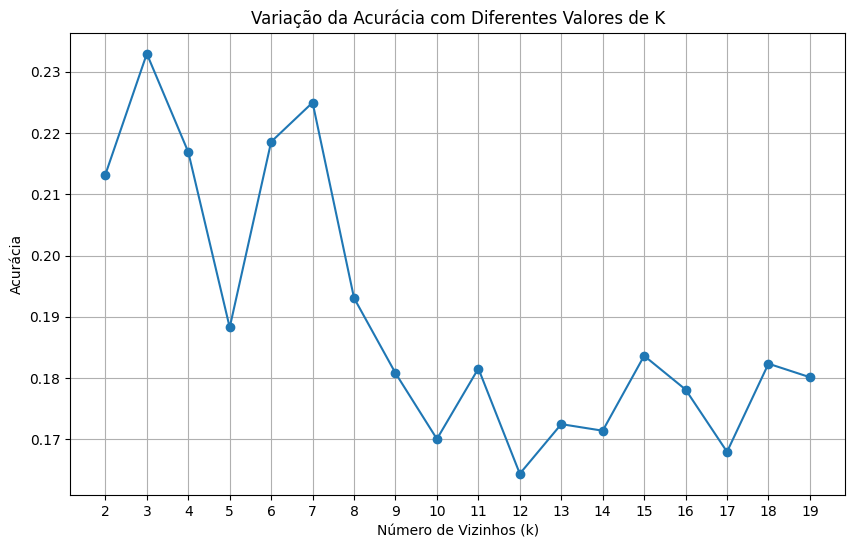

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot('cluster', 'ss_list', marker='o', data=df1)
plt.title('Variação da Acurácia com Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.xticks(clusters)
#plt.xlim(1, 11)
#plt.ylim(0.065,0.072)
plt.grid(True)
plt.show()

### 4.2.2. AFFINITY PROPAGATION

In [ ]:
preferences = np.arange(-1,-200,-1)
ss_score = []

In [ ]:
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score

for preference in preferences:
  # Model Definition
  model = AffinityPropagation(preference=preference)

  # Model Training
  labels = model.fit_predict( X )

  # performance
  ss_avg = mt.silhouette_score( X, labels )

  # add silhouette to list
  ss_score.append( ss_avg )

In [ ]:
data = {'preference':preferences,'ss_score':ss_score}
df1 = pd.DataFrame(data)
df2 = df1.sort_values('ss_score', ascending=False)

In [ ]:
df3 = df2.head()

In [ ]:
df3

,preference,ss_score
156,-157,0.215123
179,-180,0.215123
149,-150,0.215123
155,-156,0.215123
145,-146,0.215123


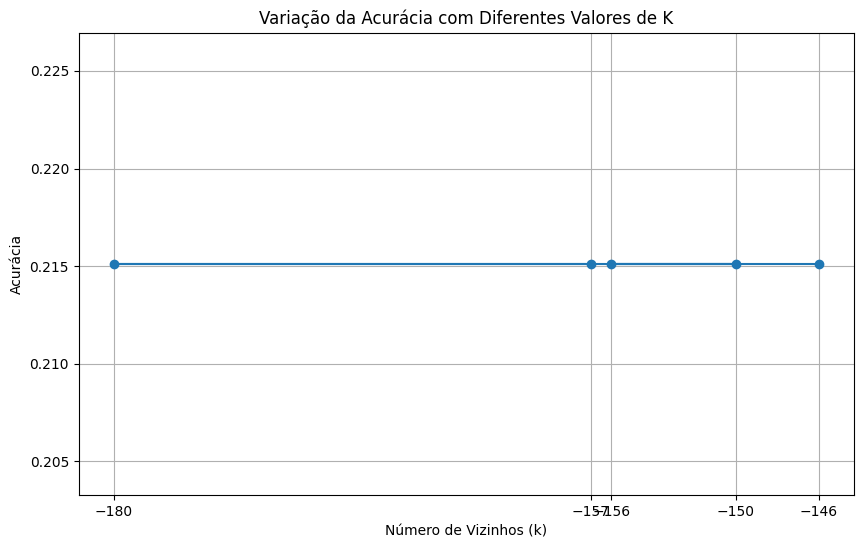

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot('preference', 'ss_score', marker='o', data=df3)
plt.title('Variação da Acurácia com Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.xticks(df3['preference'])
#plt.xlim(1, 11)
#plt.ylim(0.065,0.072)
plt.grid(True)
plt.show()

## 4.3. MODEL ANALYSIS

### 4.3.1. K-MEANS

In [ ]:
# Treinar o modelo
model = ct.KMeans( n_clusters = 3, n_init=10, random_state=42 )
labels = model.fit_predict( X )

# performance
ss_avg = mt.silhouette_score( X, labels )

In [ ]:
p1 = performance_clus('K-MEANS', X, labels)

### 4.3.2. AFFINITY PROPAGATION

In [ ]:
# Treinar o modelo
model = AffinityPropagation(preference=-157)
labels = model.fit_predict( X )

# performance
ss_avg = mt.silhouette_score( X, labels )

In [ ]:
p2 = performance_clus('AFFINITY PROPAGATION', X, labels)

### 4.3.3. RESULTADOS

In [ ]:
dataframe_test = [ p1, p2 ]

In [ ]:
pd.concat(dataframe_test)

,Model Name,SS,Clusters
0,K-MEANS,0.233,3
0,AFFINITY PROPAGATION,0.215,3
